In [24]:
import pandas as pd

# Carregando as planilhas em dataframes
df_ird = pd.read_excel('REMOVIDOS COM CEP NONAME V2.xlsx', sheet_name='IRD')
df_planilha4 = pd.read_excel('REMOVIDOS COM CEP NONAME V2.xlsx', sheet_name='Planilha4')

# Realizando a junção das planilhas com base nas colunas CO_ENTIDADE e Código da Escola
df_juncao = pd.merge(df_planilha4, df_ird, left_on='CO_ENTIDADE', right_on='Código da Escola')

# Salvando a nova planilha "junção" em um novo arquivo Excel
df_juncao.to_excel('novo_workbook.xlsx', sheet_name='junção', index=False)


Exception ignored in: <function ZipFile.__del__ at 0x7fdfceba12d0>
Traceback (most recent call last):
  File "/usr/lib/python3.10/zipfile.py", line 1819, in __del__
    self.close()
  File "/usr/lib/python3.10/zipfile.py", line 1836, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file


In [2]:
import pandas as pd

# Carregando as planilhas em dataframes
df_juncao = pd.read_excel('novo_workbook.xlsx', sheet_name='junção')
df_planilha2 = pd.read_excel('novo_workbook.xlsx', sheet_name='Planilha2')

# Realizando a junção das planilhas com base na coluna CO_ENTIDADE
df_juncao3 = pd.merge(df_juncao, df_planilha2[['CO_ENTIDADE', 'NO_BAIRRO']], on='CO_ENTIDADE')

# Salvando a nova planilha "junção3" em um novo arquivo Excel
df_juncao3.to_excel('novo_workbook.xlsx', sheet_name='junção3', index=False)


ValueError: Worksheet named 'Planilha2' not found

In [12]:
import requests

def consultar_bairro_por_cep(cep):
    url = f"https://api.postmon.com.br/v1/cep/{cep}"
    
    try:
        response = requests.get(url)
        data = response.json()
        
        if response.status_code == 200:
            bairro = data.get("bairro")
            return bairro
        else:
            print("Não foi possível obter o bairro.")
    
    except requests.exceptions.RequestException as e:
        print("Erro de conexão:", e)
    
    return None

# Exemplo de uso
cep = "02860001"  # CEP desejado

bairro = consultar_bairro_por_cep(cep)
if bairro:
    print(f"O bairro correspondente ao CEP {cep} é: {bairro}")


O bairro correspondente ao CEP 02860001 é: Vila Souza


In [2]:
import pandas as pd

In [17]:
df = pd.read_excel('novo_workbook.xlsx', sheet_name='junção')
df = '0' + df['CO_CEP'].astype(str) 
ceps = df.to_list()

In [18]:
ceps

['05118000',
 '05208230',
 '02806000',
 '02860001',
 '05267000',
 '05204110',
 '02881100',
 '05172270',
 '02855220',
 '02871040',
 '02982000',
 '05103060',
 '02919100',
 '02913100',
 '05132110',
 '05118000',
 '05159200',
 '05110000',
 '05176000',
 '02942000',
 '05131100',
 '02945100',
 '02867000',
 '05181000',
 '02809040',
 '05141010',
 '02806000',
 '02860001',
 '02878120',
 '02515050',
 '02533010',
 '02524020',
 '02518010',
 '02734000',
 '02555050',
 '02961030',
 '02615100',
 '02751000',
 '02737100',
 '02965170',
 '02975120',
 '02612020',
 '02723000',
 '02710000',
 '02927000',
 '02537000',
 '02929000',
 '02522050',
 '02720100',
 '02756030',
 '02522100',
 '02545060',
 '02722000',
 '02543000',
 '02960020',
 '02950010',
 '02563010',
 '02759030',
 '02720200',
 '02610010',
 '02726000',
 '02729080',
 '02805140',
 '02912040',
 '02403020',
 '02461000',
 '02122011',
 '02071010',
 '02633000',
 '02114002',
 '02072000',
 '02402300',
 '02422090',
 '02072002',
 '02111031',
 '02071013',
 '02435001',

In [22]:
import requests
from openpyxl import Workbook

def consultar_bairro_por_cep(cep):
    url = f"https://api.postmon.com.br/v1/cep/{cep}"
    
    try:
        response = requests.get(url)
        data = response.json()
        
        if response.status_code == 200:
            bairro = data.get("bairro")
            return bairro
        else:
            print("Não foi possível obter o bairro.")
    
    except requests.exceptions.RequestException as e:
        print("Erro de conexão:", e)
    
    return None



for cep in ceps:
    bairro = consultar_bairro_por_cep(cep)
    if bairro:
        with open('ar.txt', 'a') as arquivo:
            arquivo.write(f"{bairro}\n")

    else:
        with open('ar.txt', 'a') as arquivo:
            arquivo.write(f"Não encontrado\n")
    
   

# Salvar o workbook



In [28]:
import pandas as pd

# Abrir o arquivo .txt e ler os dados
with open('ar.txt', 'r') as file:
    bairros = file.readlines()

# Criar um DataFrame com os bairros
df = pd.DataFrame({'Bairro': bairros})

# Criar uma planilha chamada "Planilha" e salvar o DataFrame nela
df2 = pd.read_excel('novo_workbook.xlsx', sheet_name='Planilha')
df2['Bairro'] = df['Bairro']
df2.to_excel('novo_planilha.xlsx', sheet_name='Planilha', index=False)

In [32]:
import pandas as pd

# Carregar as planilhas
df_novo_planilha = pd.read_excel("novo_planilha.xlsx")
df_idh_por_bairros = pd.read_csv("idh_por_bairro.csv")

# Realizar a junção (merge) das planilhas com base no bairro
df_resultado = pd.merge(df_novo_planilha, df_idh_por_bairros, on="Bairro", how="left")

# Salvar a nova planilha
df_resultado.to_excel("nova_planilha_com_idhm.xlsx", index=False)


In [40]:
df_novo_planilha['Bairro'] = df_novo_planilha['Bairro'].str.strip()

In [58]:
# Realizar a junção (merge) das planilhas com base no bairro
df_resultado = pd.merge(df_novo_planilha, df_idh_por_bairros, on="Bairro", how="left")

# Salvar a nova planilha
df_resultado.to_excel("nova_planilha_com_idhm.xlsx", index=False)

In [59]:

# Remover linhas com valores NaN na coluna IDHM
df_nova_planilha_sem_nan = df_resultado.dropna(subset=["IDHM"])


In [60]:
df_nova_planilha_sem_nan

,QT_MAT_BAS,QT_MAT_INF,QT_MAT_INF_CRE,QT_MAT_INF_PRE,QT_MAT_FUND,QT_MAT_FUND_AI,QT_MAT_FUND_AF,QT_MAT_MED,QT_MAT_EJA,QT_MAT_EJA_FUND,...,UF,Código do Município,Nome do Município,Código da Escola,Nome da Escola,Localização,Dependência Administrativa,Média do Indicador de Regularidade do Docente (IRD),Bairro,IDHM
0,549.0,0.0,0.0,0.0,549.0,0.0,549.0,0.0,0.0,0.0,...,SP,3550308,São Paulo,35000012,AYRES DE MOURA PROFESSOR,Urbana,Estadual,3.223020,Vila Jaguara,747.000000
1,2524.0,0.0,0.0,0.0,995.0,442.0,553.0,1102.0,426.0,0.0,...,SP,3550308,São Paulo,35000024,GAVIAO PEIXOTO BRIGADEIRO,Urbana,Estadual,2.884869,Vila Perus,0.667813
5,897.0,0.0,0.0,0.0,897.0,897.0,0.0,0.0,0.0,0.0,...,SP,3550308,São Paulo,35000061,SUZANA DE CAMPOS DONA,Urbana,Estadual,2.802054,Vila Perus,0.667813
7,590.0,0.0,0.0,0.0,590.0,590.0,0.0,0.0,0.0,0.0,...,SP,3550308,São Paulo,35000085,JULIO CESAR DE OLIVEIRA PROFESSOR,Urbana,Estadual,3.181289,Vila Pirituba,0.741196
15,837.0,0.0,0.0,0.0,237.0,0.0,237.0,492.0,108.0,0.0,...,SP,3550308,São Paulo,35000164,PIO TELLES PEIXOTO PROFESSOR,Urbana,Estadual,3.004885,Vila Jaguara,747.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6200,503.0,0.0,0.0,0.0,0.0,0.0,0.0,503.0,0.0,0.0,...,SP,3550308,São Paulo,35923527,LUCIANE DO ESPIRITO SANTO PROFA,Urbana,Estadual,3.824963,Lajeado,0.645737
6216,574.0,0.0,0.0,0.0,366.0,0.0,366.0,208.0,0.0,0.0,...,SP,3550308,São Paulo,35923990,REPUBLICA DO SURINAME,Urbana,Estadual,2.565369,Itaim Paulista,0.665234
6229,558.0,0.0,0.0,0.0,558.0,558.0,0.0,0.0,0.0,0.0,...,SP,3550308,São Paulo,35924520,THOMAZ RODRIGUES ALCKMIN,Urbana,Estadual,3.786584,Itaim Paulista,0.665234
6243,407.0,0.0,0.0,0.0,407.0,0.0,407.0,0.0,0.0,0.0,...,SP,3550308,São Paulo,35924829,JOAO DORIA DEPUTADO,Urbana,Estadual,1.994209,Itaim Paulista,0.665234


In [ ]:
df_nova_planilha_sem_nan.to_excel("planilha_com_idh.xlsx", index=False)

In [17]:
import pandas as pd

# Carregar os dados do arquivo
df = pd.read_excel('resultados_finais_idh_ird.xlsx')

# Definir uma função para formatar os valores
def format_value(value):
    print(value)
    return float( str(value).replace(',', '.') )
    
   


# Aplicar a formatação à coluna
df['IDHM'] = df['IDHM'].apply(lambda x: format_value(x))

# Exibir o DataFrame atualizado
df.to_excel('resultados_finais_idh_ird4.xlsx', index=False)

0.747
0.6678125
0.6678125
0.741196078431373
0.747
0.687789473684211
0.773882352941176
0.740666666666667
0.740666666666667
0.740666666666667
0.791642857142857
0.774365853658537
0.75025
0.774365853658537
0.791642857142857
0.774365853658537
0.75025
0.75025
0.774365853658537
0.791642857142857
0.791642857142857
0.71225
0.689833333333333
0.689833333333333
0.82375
0.82375
0.689833333333333
0.718630136986301
0.793222222222222
0.793222222222222
0.840444444444444
0.840444444444444
0.793222222222222
0.840444444444444
0.706166666666667
0.840444444444444
0.840444444444444
0.793222222222222
0.793222222222222
0.840444444444444
0.793222222222222
0.762243243243243
0.762243243243243
0.762243243243243
0.762243243243243
0.7838
0.7838
0.7838
0.7838
0.7838
0.75255
0.75255
0.7838
0.7838
0.75255
0.776892857142857
0.776892857142857
0.776892857142857
0.694
0.694
0.635545454545454
0.693416666666667
0.668793103448276
0.707083333333333
0.73130612244898
0.707083333333333
0.707083333333333
0.73130612244898
0.7070833

In [1]:
import pandas as pd

# Ler as planilhas
df_removidos = pd.read_excel('df_removidos_final.xlsx')
resultados_finais = pd.read_excel('resultados_finais_idh_ird.xlsx')

# Realizar o merge das planilhas usando as colunas CO_CEP e CEP_ORIGEM
merged_df = pd.merge(df_removidos, resultados_finais[['CO_CEP', 'IRD']], left_on='CEP_ORIGEM', right_on='CO_CEP', how='inner')

# Salvar o resultado em uma nova planilha
merged_df.to_excel('nova_planilha.xlsx', index=False)


In [2]:
df = pd.read_excel('nova_planilha.xlsx')
df

,Unnamed: 0,CONCURSO_REMOCAO,CEP,CARGO,ANO,ORIGEM,TIPO_ORIGEM,UNIDADE_ORIGEM,DRE_ORIGEM,GDA_GLT_ORIGEM,...,REMOVEU,GDA_GLT_DESTINO,CEP_ORIGEM,CEP_DESTINO,DISTANCIA_INICIAL,TEMPO_INICIAL,DISTANCIA_DEPOIS,TEMPO_DEPOIS,CO_CEP,IRD
0,20,REMOÇÃO PROF.TITULARES,2452002,PROF.ED.INF.E ENS.FUND.I,2022,91561,EMEI,ABELARDO GALDINO PINTO - PIOLIN,FB,NaN,...,S,NaN,2515040,2536140,2818.0,538.0,662.0,126.0,2515040,4.058341
1,23,REMOÇÃO PROF.TITULARES,2378080,PROF.ED.INF.E ENS.FUND.I,2022,91561,EMEI,ABELARDO GALDINO PINTO - PIOLIN,FB,NaN,...,S,NaN,2515040,2536140,9635.0,1588.0,6648.0,1083.0,2515040,4.058341
2,58,REMOÇÃO PROF.TITULARES,2077000,PROF.ED.INF.E ENS.FUND.I,2022,91561,EMEI,ABELARDO GALDINO PINTO - PIOLIN,FB,NaN,...,S,NaN,2515040,2515040,9122.0,1131.0,9122.0,1131.0,2515040,4.058341
3,91,REMOÇÃO PROF.TITULARES,2510060,PROF.ED.INF.E ENS.FUND.I,2022,91561,EMEI,ABELARDO GALDINO PINTO - PIOLIN,FB,NaN,...,S,NaN,2515040,2515040,1532.0,366.0,1532.0,366.0,2515040,4.058341
4,127,REMOÇÃO PROF.TITULARES,2542080,PROF.ED.INF.E ENS.FUND.I,2022,91561,EMEI,ABELARDO GALDINO PINTO - PIOLIN,FB,NaN,...,S,NaN,2515040,2473010,3807.0,729.0,1839.0,331.0,2515040,4.058341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1766,7741,REMOÇÃO AUX TEC EDUCACAO,4757000,AUXILIAR TECNICO DE EDUCACAO,2022,90492,EMEI,BORBA GATO,SA,NaN,...,S,NaN,4752010,5686050,3100.0,593.0,7881.0,748.0,4752010,4.202307
1767,7385,REMOÇÃO AUX TEC EDUCACAO,8421155,AUXILIAR TECNICO DE EDUCACAO,2022,13498,EMEI,"JOSE ROBERTO DE CASTRO RIBEIRO, PROF.",G,NaN,...,S,NaN,8475410,8420730,5673.0,972.0,1366.0,235.0,8475410,3.592294
1768,7417,REMOÇÃO AUX TEC EDUCACAO,1552010,AUXILIAR TECNICO DE EDUCACAO,2022,92436,EMEI,"PAULO ALVES, TTE.",IP,NaN,...,S,NaN,4139010,1518080,6250.0,919.0,2651.0,494.0,4139010,3.516876
1769,8005,REMOÇÃO AUX TEC EDUCACAO,9732450,AUXILIAR TECNICO DE EDUCACAO,2022,10138,EMEF,"ELZA MAIA COSTA FREIRE, PROFA.",SA,NaN,...,S,NaN,4405190,4161060,15981.0,1970.0,11344.0,977.0,4405190,3.470765


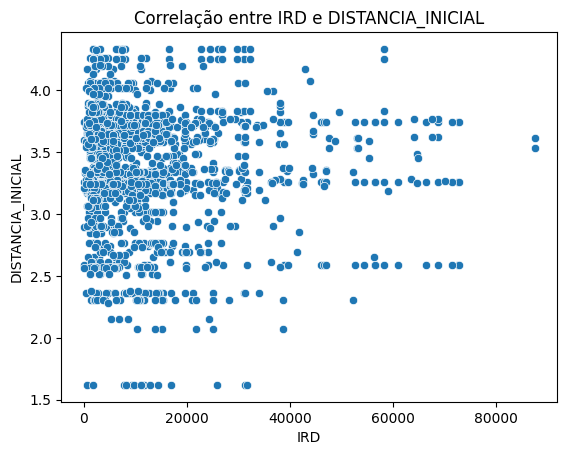

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ler a planilha "nova_planilha.xlsx"
df_nova_planilha = pd.read_excel('nova_planilha.xlsx')

# Extrair as colunas de interesse
ird = df_nova_planilha['IRD']
distancia_inicial = df_nova_planilha['DISTANCIA_INICIAL']

# Criar o gráfico de dispersão (scatter plot)
sns.scatterplot(x=distancia_inicial, y=ird)
plt.xlabel('IRD')
plt.ylabel('DISTANCIA_INICIAL')
plt.title('Correlação entre IRD e DISTANCIA_INICIAL')
plt.show()



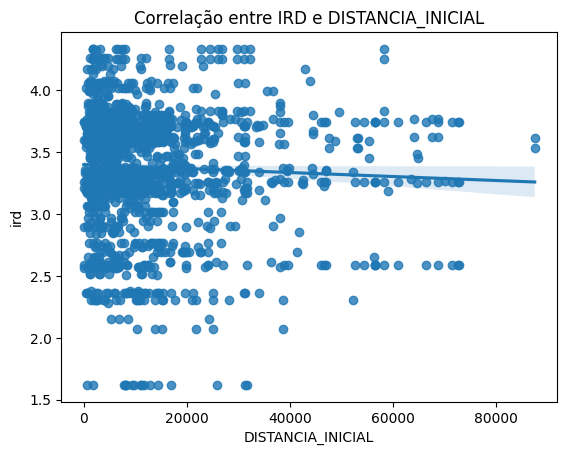

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ler a planilha "nova_planilha.xlsx"
df_nova_planilha = pd.read_excel('nova_planilha.xlsx')

# Extrair as colunas de interesse
ird = df_nova_planilha['IRD']
distancia_inicial = df_nova_planilha['DISTANCIA_INICIAL']

# Criar o gráfico de dispersão (scatter plot) com linha de regressão
sns.regplot(x=distancia_inicial , y=ird)
plt.xlabel('DISTANCIA_INICIAL')
plt.ylabel('ird')
plt.title('Correlação entre IRD e DISTANCIA_INICIAL')
plt.show()



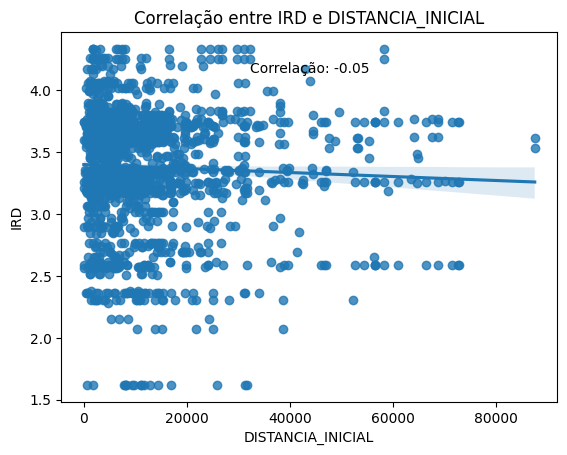

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Ler a planilha "nova_planilha.xlsx"
df_nova_planilha = pd.read_excel('nova_planilha.xlsx')

# Extrair as colunas de interesse
ird = df_nova_planilha['IRD']
distancia_inicial = distancia_inicial[distancia_inicial > 2000]
distancia_inicial = df_nova_planilha['DISTANCIA_INICIAL']

# Calcular a correlação entre as colunas
correlation = ird.corr(distancia_inicial)

# Criar o gráfico de dispersão (scatter plot) com linha de regressão
sns.regplot(x=distancia_inicial, y=ird)
plt.xlabel('DISTANCIA_INICIAL')
plt.ylabel('IRD')
plt.title('Correlação entre IRD e DISTANCIA_INICIAL')
plt.text(0.5, 0.9, f'Correlação: {correlation:.2f}', ha='center', va='center', transform=plt.gca().transAxes)
plt.show()


In [36]:
import pandas as pd

# Ler a planilha "nova_planilha.xlsx"
df_nova_planilha = pd.read_excel('nova_planilha.xlsx')

# Calcular a média das colunas "DISTANCIA_INICIAL" e "IRD" agrupadas pelo "CEP_ORIGEM"
# df_media_por_cep = df_nova_planilha.groupby('CEP_ORIGEM').agg({'TEMPO_INICIAL': 'median', 'IRD': 'mean', 'TEMPO_DEPOIS':'mean'}).reset_index()
df = df_nova_planilha[['TEMPO_INICIAL','TEMPO_FINAL']]
# Salvar o resultado em uma nova planilha
df_media_por_cep.to_excel('media_por_ceps.xlsx', index=False)



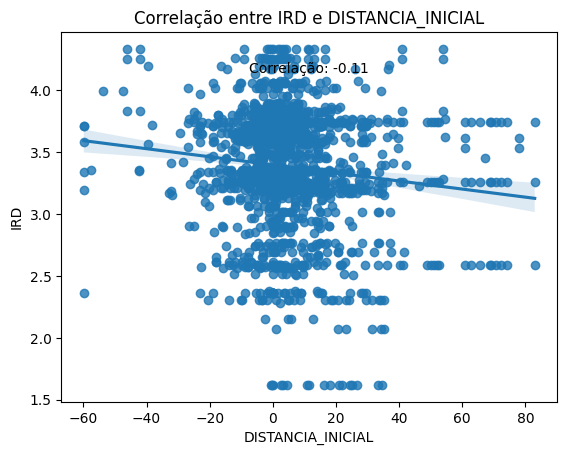

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Ler a planilha "nova_planilha.xlsx"
df_nova_planilha = pd.read_excel('nova_planilha.xlsx')

# Extrair as colunas de interesse
ird = df_nova_planilha['IRD']

distancia_inicial = (df_nova_planilha['TEMPO_INICIAL'] - df_nova_planilha['TEMPO_DEPOIS'])/60

# Calcular a correlação entre as colunas
correlation = ird.corr(distancia_inicial)

# Criar o gráfico de dispersão (scatter plot) com linha de regressão
sns.regplot(x=distancia_inicial, y=ird)
plt.xlabel('DISTANCIA_INICIAL')
plt.ylabel('IRD')
plt.title('Correlação entre IRD e DISTANCIA_INICIAL')
plt.text(0.5, 0.9, f'Correlação: {correlation:.2f}', ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

In [14]:
import pandas as pd
df = pd.read_csv('../data/dados_gerais.csv')
df['Pontuação IRD'] = df['Pontuação IRD'].apply(lambda x:(str(x)[0:4])).astype(float)
df['IDHM'] = df['IDHM'].apply(lambda x:(str(x)[0:4])).astype(float)
df.to_csv('../data/dados_gerais.csv', index=False)